In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-v0_8-muted')

print("✅ Libraries berhasil diimport dan siap digunakan!")

Matplotlib is building the font cache; this may take a moment.


# 🧠 Brielle Sentiment Intelligence
**Author:** Brielle Christabel  
**Category:** Data Analysis + NLP  
**Tech Stack:** Python, Pandas, Matplotlib, Hugging Face Transformers  

---

### 💬 About This Project  
This notebook demonstrates how Natural Language Processing (NLP) can be used to analyze customer feedback and automatically detect sentiments — whether they are **positive**, **neutral**, or **negative**.  

The project showcases a simple yet powerful pipeline using the **Hugging Face Transformers** library to process real-world text data (such as e-commerce or product reviews).  

It’s designed to serve as a professional portfolio piece that reflects both **data analysis skills** and **AI engineering understanding** — engineered by *Brielle Christabel*, founder of *The Brielle Engine*.

## ⚙️ Installation & Setup

Make sure all dependencies are installed before running the notebook.  
If you're using a new environment, run the following in your terminal:

```bash
pip install -r requirements.txt

## 2. Load & Explore Data

Pada tahap ini, kita akan memuat dataset yang telah disiapkan, kemudian melakukan eksplorasi awal untuk memahami struktur data, jenis kolom, serta melihat beberapa contoh data. Hal ini penting untuk memastikan dataset siap digunakan dalam proses analisis sentimen.

In [17]:
import pandas as pd
df = pd.read_csv("reviews_sample.csv")
df.head()

,review
0,I love the product! It works perfectly.
1,Delivery took too long and packaging was damaged.
2,"Great value for money, will buy again!"
3,"Not satisfied, the item stopped working after ..."
4,Customer service was very helpful and responsive.


In [18]:
# Melihat informasi umum dataset
df.info()

# Melihat statistik deskriptif
df.describe()

# Melihat jumlah data unik per kolom
df.nunique()

# Mengecek data kosong (missing values)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  7 non-null      object
dtypes: object(1)
memory usage: 184.0+ bytes


review    0
dtype: int64

In [20]:
# Menampilkan seluruh isi review
for i, text in enumerate(df["review"], 1):
    print(f"{i}. {text}\n")

1. I love the product! It works perfectly.

2. Delivery took too long and packaging was damaged.

3. Great value for money, will buy again!

4. Not satisfied, the item stopped working after a week.

5. Customer service was very helpful and responsive.

6. Average quality, expected more for the price.

7. Excellent quality and super fast delivery!



### 🔍 Data Exploration — Melihat Isi Review

Berikut adalah isi dari setiap ulasan pelanggan yang terdapat dalam dataset `reviews_sample.csv`.  
Setiap baris merepresentasikan satu opini pelanggan yang akan dianalisis untuk mengetahui sentimennya (positif, negatif, atau netral).

Dari hasil eksplorasi awal, kita dapat melihat bahwa data bersifat teks bebas (unstructured text), sehingga tahap selanjutnya adalah melakukan **preprocessing** seperti:
- Membersihkan tanda baca dan karakter non-alfabet
- Mengubah huruf menjadi lowercase
- Menghapus stopwords
- Dan menyiapkan teks untuk analisis sentimen lebih lanjut

Langkah ini penting untuk memastikan model dapat memahami makna dari setiap review secara optimal.

### 🧹 Data Cleaning & Preprocessing

Sebelum analisis sentimen dilakukan, teks perlu dibersihkan terlebih dahulu agar model tidak salah memahami kata.  
Langkah-langkah preprocessing meliputi:
1. Mengubah semua teks menjadi huruf kecil (lowercase)  
2. Menghapus tanda baca, angka, dan karakter spesial  
3. Menghapus stopwords (kata umum seperti “dan”, “yang”, “di”, dll)  
4. Melakukan tokenisasi (memecah kalimat menjadi kata-kata)  

Proses ini akan membantu model memahami konteks dan emosi di setiap kalimat dengan lebih akurat.

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # ← tambahkan baris ini
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re, string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     AK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\USER
[nltk_data]     AK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     AK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,cleaned_review
0,I love the product! It works perfectly.,love product works perfectly
1,Delivery took too long and packaging was damaged.,delivery took long packaging damaged
2,"Great value for money, will buy again!",great value money buy
3,"Not satisfied, the item stopped working after ...",satisfied item stopped working week
4,Customer service was very helpful and responsive.,customer service helpful responsive


In [15]:
# Install transformers dan torch jika belum
!pip install transformers torch --quiet

# Import library
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import numpy as np

# Load model dan tokenizer terbaik
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Fungsi untuk prediksi sentimen
def get_sentiment(text):
    encoded = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    labels = ['negative', 'neutral', 'positive']
    return labels[np.argmax(scores)]

# Terapkan ke dataset
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Lihat hasilnya
df.head()

Script file 'C:\Users\USER AK\anaconda3\envs\sentiment\Scripts\pip-script.py' is not present.


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

C:\Users\USER AK\anaconda3\envs\sentiment\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER AK\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,review,cleaned_review,sentiment
0,I love the product! It works perfectly.,love product works perfectly,positive
1,Delivery took too long and packaging was damaged.,delivery took long packaging damaged,negative
2,"Great value for money, will buy again!",great value money buy,positive
3,"Not satisfied, the item stopped working after ...",satisfied item stopped working week,negative
4,Customer service was very helpful and responsive.,customer service helpful responsive,positive


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

C:\Users\USER AK\anaconda3\envs\sentiment\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


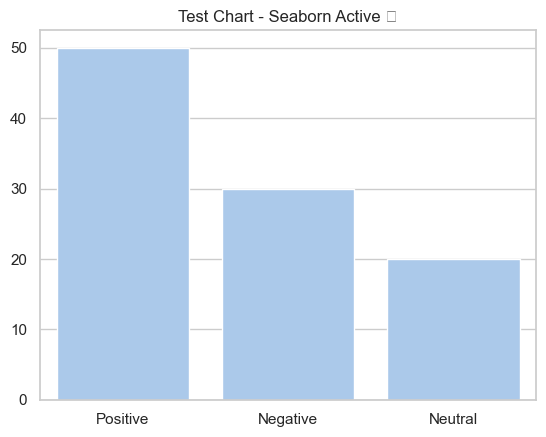

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# Tes visualisasi sederhana biar yakin seaborn aktif
sns.barplot(x=["Positive", "Negative", "Neutral"], y=[50, 30, 20])
plt.title("Test Chart - Seaborn Active 💫")
plt.show()

In [5]:
import pandas as pd

# Buat data contoh langsung
data = {
    "review": [
        "I really love this product! It works perfectly.",
        "Terrible experience, I will never buy again.",
        "It's okay, not too bad but not great either.",
        "Excellent quality and fast shipping!",
        "The packaging was awful, very disappointed."
    ]
}

df = pd.DataFrame(data)

# Lihat data
df.head()

,review
0,I really love this product! It works perfectly.
1,"Terrible experience, I will never buy again."
2,"It's okay, not too bad but not great either."
3,Excellent quality and fast shipping!
4,"The packaging was awful, very disappointed."


In [6]:
from transformers import pipeline

# Load model sentiment analysis
sentiment_model = pipeline("sentiment-analysis")

# Terapkan model ke kolom review
df["sentiment"] = df["review"].apply(lambda x: sentiment_model(x)[0]["label"])

# Tampilkan hasil
df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,review,sentiment
0,I really love this product! It works perfectly.,POSITIVE
1,"Terrible experience, I will never buy again.",NEGATIVE
2,"It's okay, not too bad but not great either.",NEGATIVE
3,Excellent quality and fast shipping!,POSITIVE
4,"The packaging was awful, very disappointed.",NEGATIVE


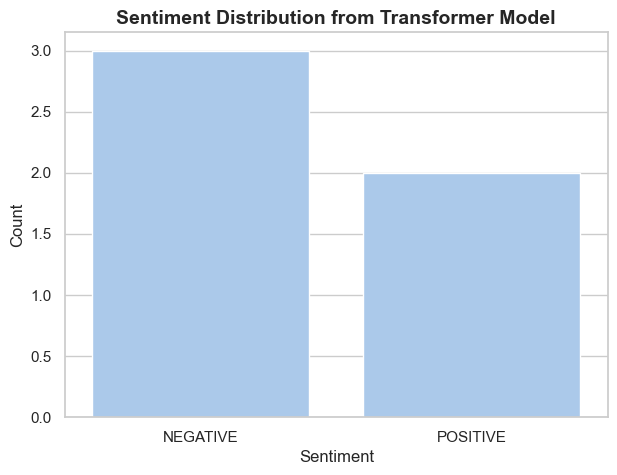

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan library siap
sns.set(style="whitegrid", palette="pastel")

# Hitung jumlah masing-masing sentimen
sentiment_counts = df["sentiment"].value_counts().reset_index()
sentiment_counts.columns = ["sentiment", "count"]

# Bikin grafik
plt.figure(figsize=(7,5))
sns.barplot(x="sentiment", y="count", data=sentiment_counts)

# Judul dan label
plt.title("Sentiment Distribution from Transformer Model", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Tampilkan hasil
plt.show()